In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
column_names = [
    "Index", "Image ID", "Rating 1", "Rating 2", "Rating 3", 
    "Rating 4", "Rating 5", "Rating 6", "Rating 7", 
    "Rating 8", "Rating 9", "Rating 10", 
    "Tag 1", "Tag 2", "Challenge ID"
]

In [7]:
ava = pd.read_csv(
    "/kaggle/input/ava-aesthetic-visual-assessment/AVA_Files/AVA.txt",  # путь к вашему файлу
    delim_whitespace=True,  # разделитель — пробел
    header=None,  # отсутствует строка с заголовками
    names=column_names  # назначаем имена столбцам
)
ava = ava.drop(columns = ["Index"])

In [ ]:
ava.head()

In [9]:
challenges_columns = ["Challenge ID", "Name"]
challenges = pd.read_csv(
    "/kaggle/input/ava-aesthetic-visual-assessment/AVA_Files/challenges.txt",  # путь к вашему файлу
    delim_whitespace=True,  # разделитель — пробел
    header=None,  # отсутствует строка с заголовками
    names=challenges_columns  # назначаем имена столбцам
)

найдем среднюю оценку на каждое изображение

In [10]:
challenges.head()

,Challenge ID,Name
0,1396,100_Meters
1,1004,100_Years_Old
2,1329,100_Years_Old_II
3,608,12_Days_Of_Christmas
4,311,1970s


In [ ]:
ava["mean"] = 

In [11]:
tags_names = ["Tag ID", "Name"]

# Читаем файл построчно
with open("/kaggle/input/ava-aesthetic-visual-assessment/AVA_Files/tags.txt", "r") as file:
    rows = []
    for line in file:
        # Разделяем строку по первому пробелу (чтобы сохранить текст с пробелами в "Name")
        parts = line.strip().split(" ", 1)
        if len(parts) == 2:  # Убедимся, что есть и ID, и Name
            rows.append(parts)

# Преобразуем данные в DataFrame
tags = pd.DataFrame(rows, columns=tags_names)

In [ ]:
tags

In [12]:
tag_counts = ava["Tag 1"].value_counts() + ava["Tag 2"].value_counts()
tag_counts = tag_counts.sort_values(ascending=False)

# Получение 5 самых популярных типов
top_tags = tag_counts.head(5).index

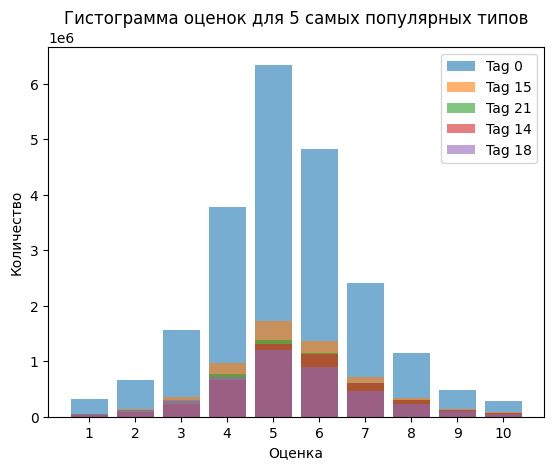

In [13]:

# Подготовка данных для гистограммы
ratings_columns = ["Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5", 
                   "Rating 6", "Rating 7", "Rating 8", "Rating 9", "Rating 10"]

for tag in top_tags:
    tag_data = ava[(ava["Tag 1"] == tag) | (ava["Tag 2"] == tag)]
    ratings_sum = tag_data[ratings_columns].sum()
    plt.bar(range(1, 11), ratings_sum, alpha=0.6, label=f"Tag {tag}")

# Настройки графика
plt.xticks(range(1, 11))
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.title("Гистограмма оценок для 5 самых популярных типов")
plt.legend()
plt.show()




In [14]:
tag_counts

0     163053.0
15     28384.0
21     23088.0
14     21983.0
18     19403.0
        ...   
64        52.0
60        49.0
54        30.0
55        24.0
1          NaN
Name: count, Length: 66, dtype: float64

## Base line small dataset

пробую Efficient net  b1 small dataset без учета тегов и стилей


In [15]:
import numpy as np

In [16]:
# Вычисляем общее количество голосов
ratings = ava.iloc[:, 2:12].values  # Колонки с "Rating 1" по "Rating 10"
total_votes = np.sum(ratings, axis=1)

# Вычисляем среднюю оценку и дисперсию
ava['MeanRating'] = np.sum(ratings * np.arange(1, 11), axis=1) / total_votes
ava['Variance'] = np.sum(ratings * (np.arange(1, 11) - ava['MeanRating'].values[:, None])**2, axis=1) / total_votes

In [17]:
import pandas as pd

# Предположим, ваш DataFrame называется `ava`
# Колонки оценок
rating_columns = ["Rating 1", "Rating 2", "Rating 3", "Rating 4", 
                  "Rating 5", "Rating 6", "Rating 7", "Rating 8", 
                  "Rating 9", "Rating 10"]

# Создаём новый DataFrame с Image ID
distribution_df = ava[["Image ID"]].copy()

# Суммируем оценки для каждой строки
ava["Total Ratings"] = ava[rating_columns].sum(axis=1)

# Преобразуем оценки в распределение и добавляем в новый DataFrame
for col in rating_columns:
    distribution_df[col] = ava[col] / ava["Total Ratings"]

# Удаляем временную колонку Total Ratings из оригинального DataFrame
ava.drop(columns=["Total Ratings"], inplace=True)

# Сохраняем новый DataFrame в CSV (опционально)
distribution_df.to_csv("image_id_with_distributions.csv", index=False)


In [87]:
distribution_df.head()

,Image ID,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Rating 6,Rating 7,Rating 8,Rating 9,Rating 10
0,953619,0.000000,0.008065,0.040323,0.137097,0.306452,0.290323,0.120968,0.048387,0.040323,0.008065
1,953958,0.079365,0.055556,0.119048,0.206349,0.206349,0.166667,0.079365,0.063492,0.007937,0.015873
2,954184,0.000000,0.000000,0.031746,0.063492,0.325397,0.444444,0.079365,0.023810,0.031746,0.000000
3,954113,0.000000,0.007812,0.031250,0.046875,0.375000,0.289062,0.179688,0.039062,0.015625,0.015625
4,953980,0.000000,0.023256,0.046512,0.116279,0.441860,0.302326,0.046512,0.007752,0.007752,0.007752


выделим тренировочную и валидационную части

In [25]:
# Разделение данных на тренировочную и валидационную выборки
train_size = 2000
val_size = 1000

# Перемешиваем данные
distribution_df = distribution_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Делим на тренировочную и валидационную таблицы
train_df = distribution_df.iloc[:train_size]
val_df = distribution_df.iloc[train_size:train_size + val_size]

# Сохраняем результаты в файлы (опционально)
train_df.to_csv("train_distribution.csv", index=False)
val_df.to_csv("val_distribution.csv", index=False)

In [41]:
val_df

,Image ID,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Rating 6,Rating 7,Rating 8,Rating 9,Rating 10
2000,340212,0.000000,0.007782,0.015564,0.085603,0.186770,0.295720,0.221790,0.105058,0.062257,0.019455
2001,923077,0.008547,0.051282,0.102564,0.153846,0.299145,0.247863,0.085470,0.017094,0.025641,0.008547
2002,618336,0.006289,0.000000,0.012579,0.106918,0.377358,0.295597,0.132075,0.044025,0.025157,0.000000
2003,80183,0.031915,0.058511,0.132979,0.281915,0.260638,0.154255,0.058511,0.010638,0.005319,0.005319
2004,559401,0.000000,0.000000,0.007463,0.089552,0.298507,0.417910,0.126866,0.037313,0.022388,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2995,445055,0.019704,0.014778,0.113300,0.344828,0.339901,0.103448,0.034483,0.019704,0.000000,0.009852
2996,338339,0.000000,0.005208,0.020833,0.088542,0.276042,0.333333,0.151042,0.062500,0.041667,0.020833
2997,522372,0.000000,0.011905,0.023810,0.226190,0.410714,0.261905,0.035714,0.023810,0.000000,0.005952
2998,24606,0.000000,0.000000,0.000000,0.031496,0.118110,0.236220,0.188976,0.283465,0.094488,0.047244


In [26]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image, UnidentifiedImageError

In [27]:
simple_transforms = transforms.Compose([  # Изменение размера изображения
    transforms.ToTensor(),         # Преобразование в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
])

In [28]:
import torch
import torchvision.transforms.functional as F

import torch
import torchvision.transforms.functional as F

def collater(batch):
    """
    Пакетирует батч с динамическим дополнением (Padding).
    """
    # Проверяем, что батч не пустой
    if not batch:
        raise ValueError("Пустой батч передан в collater.")

    # Определяем максимальные размеры в батче
    max_height = max(item['img'].shape[1] for item in batch)
    max_width = max(item['img'].shape[2] for item in batch)

    images = []
    labels = []


    for item in batch:
        padded_image = F.pad(item['img'],
                             (0, max_height - item['img'].size(1),max_width - item['img'].size(2), 0
                             ), 0)
        images.append(padded_image)

        # Собираем метки (распределения оценок)
        labels.append(torch.as_tensor(item['label'], dtype=torch.float32))

    # Преобразуем списки в тензоры
    images = torch.stack(images, dim=0)  # Все изображения одного размера
    labels = torch.stack(labels, dim=0)

    return images, labels



from torch.utils.data import Sampler
class AspectRatioBasedSampler(Sampler):
    def __init__(self, dataset, batch_size=1, drop_last=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.indices = list(range(len(dataset)))
        self.aspect_ratios = self._get_aspect_ratios()

    def _get_aspect_ratios(self):
        aspect_ratios = []
        for idx in self.indices:
            image = self.dataset[idx]['img']
            height, width = image.shape[1], image.shape[2]
            aspect_ratios.append(width / height)
        return aspect_ratios

    def __iter__(self):
        sorted_indices = sorted(self.indices, key=lambda idx: self.aspect_ratios[idx])
        for i in range(0, len(sorted_indices), self.batch_size):
            if self.drop_last and i + self.batch_size > len(sorted_indices):
                break
            yield sorted_indices[i:i + self.batch_size]

    def __len__(self):
        if self.drop_last:
            return len(self.indices) // self.batch_size
        return (len(self.indices) + self.batch_size - 1) // self.batch_size

In [29]:
# Безопасная загрузка изображения
def safe_image_load(img_path):
    try:
        return Image.open(img_path).convert("RGB")
    except (UnidentifiedImageError, IOError) as e:
        print(f"Ошибка загрузки изображения: {img_path}. {e}")
        return None

In [30]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image, UnidentifiedImageError

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        """
        Класс для загрузки изображений и их распределений оценок.
        
        :param dataframe: DataFrame с ID изображений и распределениями.
        :param root_dir: Папка с изображениями.
        :param transform: Преобразования для изображений.
        """
        self.annotations = dataframe  # Загружаем данные из DataFrame
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Получаем ID изображения
        img_id = str(self.annotations.iloc[idx, 0])  # Первый столбец — Image ID
        img_path = os.path.join(self.root_dir, f"{img_id}.jpg")  # Формируем путь к изображению

        try:
            # Пытаемся загрузить изображение
            image = Image.open(img_path).convert("RGB")
        except (UnidentifiedImageError, IOError) as e:
            print(f"Ошибка загрузки изображения: {img_path}. {e}")
            # Создаём "заглушку" (чёрное изображение)
            image = Image.new("RGB", (128, 128), (0, 0, 0))

        # Применяем трансформации
        if self.transform:
            image = self.transform(image)

        # Получаем распределение оценок (остальные колонки)
        label = self.annotations.iloc[idx, 1:].values.astype(float)  # Преобразуем в float

        return {'img': image, 'label': label}

In [31]:
from torch.utils.data import DataLoader

# Предположим, ваш кастомный датасет возвращает 'img' (изображение) и 'label' (распределение оценок)
train_dataset = CustomImageDataset(dataframe = train_df, 
                                   root_dir="/kaggle/input/ava-aesthetic-visual-assessment/images", 
                                   transform=simple_transforms)

# Создаём семплер
train_sampler = AspectRatioBasedSampler(train_dataset, batch_size=5, drop_last=False)

# DataLoader с кастомным семплером и collate_fn
train_dataloader = DataLoader(train_dataset, 
                              num_workers=0, 
                              collate_fn=collater, 
                              batch_sampler=train_sampler)

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)


In [49]:
from torch.utils.data import DataLoader

# Предположим, ваш кастомный датасет возвращает 'img' (изображение) и 'label' (распределение оценок)
val_dataset = CustomImageDataset(dataframe = val_df, 
                                   root_dir="/kaggle/input/ava-aesthetic-visual-assessment/images", 
                                   transform=simple_transforms)

# Создаём семплер
val_sampler = AspectRatioBasedSampler(val_dataset, batch_size=5, drop_last=False)

# DataLoader с кастомным семплером и collate_fn
val_dataloader = DataLoader(val_dataset, 
                              num_workers=0, 
                              collate_fn=collater, 
                              batch_sampler=val_sampler)

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


## Плохие изображения
953645.jpg

In [45]:
batch_indices = next(iter(train_sampler))
print(f"Индексы батча: {batch_indices}")
print(f"Количество индексов в батче: {len(batch_indices)}")


Индексы батча: [1793, 1088, 278, 629, 1012]
Количество индексов в батче: 5


In [46]:
for idx in range(4):  # Проверим первые 4 элемента
    item = train_dataset[idx]
    print(f"Элемент {idx}:")
    print("Форма изображения:", item['img'].shape)
    print("Метки:", item['label'])

Элемент 0:
Форма изображения: torch.Size([3, 533, 800])
Метки: [0.22857143 0.08571429 0.15       0.15       0.22142857 0.06428571
 0.04285714 0.02142857 0.02142857 0.01428571]
Элемент 1:
Форма изображения: torch.Size([3, 640, 510])
Метки: [0.         0.         0.         0.13709677 0.42741935 0.30645161
 0.06451613 0.04032258 0.01612903 0.00806452]
Элемент 2:
Форма изображения: torch.Size([3, 392, 720])
Метки: [0.         0.02739726 0.06849315 0.32876712 0.39041096 0.13013699
 0.04109589 0.01369863 0.         0.        ]
Элемент 3:
Форма изображения: torch.Size([3, 720, 461])
Метки: [0.         0.         0.01342282 0.04697987 0.31543624 0.36241611
 0.12751678 0.08724832 0.03355705 0.01342282]


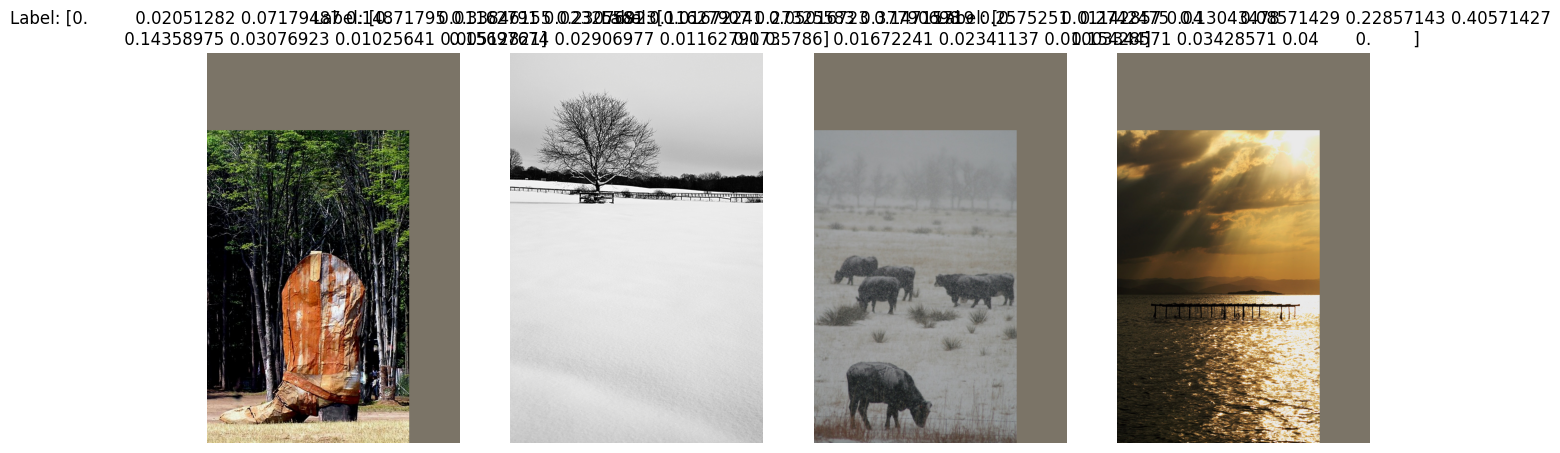

In [50]:
def denormalize(tensor, mean, std):
    """
    Де-нормализует изображение для корректного отображения.
    
    :param tensor: Нормализованное изображение (тензор [C, H, W]).
    :param mean: Список средних значений для каждого канала.
    :param std: Список стандартных отклонений для каждого канала.
    :return: Де-нормализованный тензор.
    """
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean

def visualize_specific_batch(dataloader, batch_number=0, num_images=4):
    """
    Визуализирует указанный батч из DataLoader.

    :param dataloader: DataLoader, из которого извлекаются данные.
    :param batch_number: Номер батча, который нужно визуализировать.
    :param num_images: Количество изображений для вывода.
    """
    # Создаём новый итератор DataLoader
    dataloader_iter = iter(dataloader)
    
    # Перематываем к нужному батчу
    for _ in range(batch_number + 1):
        try:
            images, labels = next(dataloader_iter)
        except StopIteration:
            print("Достигнут конец DataLoader.")
            return

    # Визуализация
    plt.figure(figsize=(15, 15))
    for i in range(min(num_images, images.size(0))):
        img = images[i]
        img = denormalize(img, mean, std)  # Де-нормализуем изображение
        img = F.to_pil_image(img)         # Преобразуем в PIL для отображения
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

# Пример вызова
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# Пример вызова
visualize_specific_batch(val_dataloader, batch_number=4, num_images=4)

УРА!! это работает- он действительно подгоняет пропорции!

In [36]:
import torch
print(f"GPU доступен: {torch.cuda.is_available()}")
print(f"Имя устройства: {torch.cuda.get_device_name(0)}")


GPU доступен: True
Имя устройства: Tesla T4


In [37]:
!pip install -q efficientnet_pytorch

  Preparing metadata (setup.py) ... done


In [39]:
from efficientnet_pytorch import EfficientNet

# Загружаем предобученную модель EfficientNet-B1
model = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 187MB/s]

Loaded pretrained weights for efficientnet-b0


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
from torch.utils.tensorboard import SummaryWriter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def save_checkpoint(state, filename='checkpoint1.pth'):
    torch.save(state, filename)

def calculate_rmse(predictions, labels):
    predicted_means = (predictions * torch.arange(1, 11, device=predictions.device)).sum(dim=1)
    true_means = (labels * torch.arange(1, 11, device=labels.device)).sum(dim=1)
    rmse = torch.sqrt(((predicted_means - true_means) ** 2).mean()).item()
    return rmse

def train_model(model, train_loader, val_loader, criterion, optimizer, writer, start_epoch=0, val_accuracy=float('inf'), num_epochs=10):
    best_val_loss = val_accuracy

    for epoch in tqdm(range(start_epoch, num_epochs)):
        model.train()
        running_loss = 0.0
        train_rmse = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)  # Выход: распределение из 10 элементов
            loss = criterion(outputs.log(), labels)  # Используем log для KLDivLoss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_rmse += calculate_rmse(outputs, labels)

        train_loss = running_loss / len(train_loader)
        train_rmse = train_rmse / len(train_loader)

        writer.add_scalar("Loss/Train", train_loss, epoch)
        writer.add_scalar("RMSE/Train", train_rmse, epoch)

        val_loss, val_rmse = evaluate_model(model, val_loader, criterion)
        writer.add_scalar("Loss/Validation", val_loss, epoch)
        writer.add_scalar("RMSE/Validation", val_rmse, epoch)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}')

        if val_loss < best_val_loss:
            print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...')
            best_val_loss = val_loss

            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
            }
            save_checkpoint(checkpoint, 'efficientnet_best_checkpoint.pth')

def evaluate_model(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    total_rmse = 0.0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Выход: распределение из 10 элементов
            loss = criterion(outputs.log(), labels)

            running_loss += loss.item()
            total_rmse += calculate_rmse(outputs, labels)

    avg_loss = running_loss / len(loader)
    avg_rmse = total_rmse / len(loader)
    return avg_loss, avg_rmse

class EfficientNetRegressor(nn.Module):
    def __init__(self):
        super(EfficientNetRegressor, self).__init__()
        # Загружаем предобученную модель
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b1')
        
        # Заменяем последний слой для задачи регрессии
        in_features = self.efficientnet._fc.in_features
        self.efficientnet._fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 10)  # Выходной слой: 10 значений (распределение оценок)
            
        )

    def forward(self, x):
        x = self.efficientnet(x)
        return torch.softmax(x, dim=1)

model = EfficientNetRegressor().to(device)
criterion = nn.KLDivLoss(reduction="batchmean")
optimizer = optim.Adam(model.parameters(), lr=1e-4)
writer = SummaryWriter(log_dir="runs/efficientnet_experiment")

assert train_dataloader is not None, "train_loader не инициализирован!"
assert val_dataloader is not None, "val_loader не инициализирован!"

train_model(model, train_dataloader, val_dataloader, criterion, optimizer, writer, num_epochs=5)
writer.close()


Loaded pretrained weights for efficientnet-b1


  0%|          | 0/5 [00:00<?, ?it/s]

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'
Epoch [1/5], Loss: 0.1862, Val Loss: 0.1531, Train RMSE: 0.6656, Val RMSE: 0.5972
Validation loss improved from inf to 0.1531. Saving model...


 20%|██        | 1/5 [03:10<12:40, 190.13s/it]

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 40%|████      | 2/5 [06:17<09:24, 188.25s/it]

Epoch [2/5], Loss: 0.1265, Val Loss: 0.1647, Train RMSE: 0.5815, Val RMSE: 0.6147
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 60%|██████    | 3/5 [09:24<06:15, 187.71s/it]

Epoch [3/5], Loss: 0.0953, Val Loss: 0.1812, Train RMSE: 0.4723, Val RMSE: 0.6526
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 80%|████████  | 4/5 [12:31<03:07, 187.49s/it]

Epoch [4/5], Loss: 0.0765, Val Loss: 0.1822, Train RMSE: 0.3810, Val RMSE: 0.6714
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


100%|██████████| 5/5 [15:38<00:00, 187.69s/it]

Epoch [5/5], Loss: 0.0647, Val Loss: 0.1976, Train RMSE: 0.3219, Val RMSE: 0.6993


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
from torch.utils.tensorboard import SummaryWriter
from scipy.stats import wasserstein_distance

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def save_checkpoint(state, filename='checkpoint1.pth'):
    torch.save(state, filename)

def calculate_rmse(predictions, labels):
    predicted_means = (predictions * torch.arange(1, 11, device=predictions.device)).sum(dim=1)
    true_means = (labels * torch.arange(1, 11, device=labels.device)).sum(dim=1)
    rmse = torch.sqrt(((predicted_means - true_means) ** 2).mean()).item()
    return rmse

def calculate_emd(predictions, labels):
    """
    Вычисляет Earth Mover's Distance (EMD) между двумя распределениями.
    :param predictions: Tensor [batch_size, num_bins] с предсказаниями (распределение вероятностей).
    :param labels: Tensor [batch_size, num_bins] с истинными метками (распределение вероятностей).
    :return: EMD для батча (среднее значение).
    """
    cdf_pred = predictions.cumsum(dim=1)  # Кумулятивное распределение предсказаний
    cdf_labels = labels.cumsum(dim=1)    # Кумулятивное распределение истинных меток
    emd = torch.abs(cdf_pred - cdf_labels).sum(dim=1).mean()  # Сумма абсолютных разностей
    return emd

def train_model(model, train_loader, val_loader, optimizer, writer, start_epoch=0, val_accuracy=float('inf'), num_epochs=10):
    best_val_loss = val_accuracy

    for epoch in tqdm(range(start_epoch, num_epochs)):
        model.train()
        running_loss = 0.0
        train_rmse = 0.0
        train_emd = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)  # Выход: распределение из 10 элементов
            loss = calculate_emd(outputs, labels)  # Используем EMD для подсчета лосса

            loss.backward()
            optimizer.step()

            running_loss += loss
            train_rmse += calculate_rmse(outputs, labels)
            train_emd += loss

        train_loss = running_loss / len(train_loader)
        train_rmse = train_rmse / len(train_loader)
        train_emd = train_emd / len(train_loader)

        writer.add_scalar("Loss/Train", train_loss, epoch)
        writer.add_scalar("RMSE/Train", train_rmse, epoch)
        writer.add_scalar("EMD/Train", train_emd, epoch)

        val_loss, val_rmse, val_emd = evaluate_model(model, val_loader)
        writer.add_scalar("Loss/Validation", val_loss, epoch)
        writer.add_scalar("RMSE/Validation", val_rmse, epoch)
        writer.add_scalar("EMD/Validation", val_emd, epoch)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}, Train EMD: {train_emd:.4f}, Val EMD: {val_emd:.4f}')

        if val_loss < best_val_loss:
            print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...')
            best_val_loss = val_loss

            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
            }
            save_checkpoint(checkpoint, 'efficientnet_best_checkpoint.pth')

def evaluate_model(model, loader):
    model.eval()
    running_loss = 0.0
    total_rmse = 0.0
    total_emd = 0.0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Выход: распределение из 10 элементов
            loss = calculate_emd(outputs, labels)

            running_loss += loss
            total_rmse += calculate_rmse(outputs, labels)
            total_emd += loss

    avg_loss = running_loss / len(loader)
    avg_rmse = total_rmse / len(loader)
    avg_emd = total_emd / len(loader)
    return avg_loss, avg_rmse, avg_emd

class EfficientNetRegressor(nn.Module):
    def __init__(self):
        super(EfficientNetRegressor, self).__init__()
        self.efficientnet = efficientnet_b1(weights=EfficientNet_B1_Weights.IMAGENET1K_V1)
        in_features = self.efficientnet.classifier[1].in_features
        self.efficientnet.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.efficientnet(x)
        return torch.softmax(x, dim=1)

model = EfficientNetRegressor().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
writer = SummaryWriter(log_dir="runs/efficientnet_experiment")

assert train_dataloader is not None, "train_loader не инициализирован!"
assert val_dataloader is not None, "val_loader не инициализирован!"

train_model(model, train_dataloader, val_dataloader, optimizer, writer, num_epochs=5)
writer.close()


  0%|          | 0/5 [00:00<?, ?it/s]

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'
Epoch [1/5], Loss: 0.6348, Val Loss: 0.5728, Train RMSE: 0.6618, Val RMSE: 0.6118, Train EMD: 0.6348, Val EMD: 0.5728
Validation loss improved from inf to 0.5728. Saving model...


 20%|██        | 1/5 [02:31<10:06, 151.69s/it]

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 40%|████      | 2/5 [04:59<07:27, 149.33s/it]

Epoch [2/5], Loss: 0.5165, Val Loss: 0.5765, Train RMSE: 0.5710, Val RMSE: 0.6167, Train EMD: 0.5165, Val EMD: 0.5765
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 60%|██████    | 3/5 [07:26<04:57, 148.55s/it]

Epoch [3/5], Loss: 0.4423, Val Loss: 0.5821, Train RMSE: 0.4856, Val RMSE: 0.6143, Train EMD: 0.4423, Val EMD: 0.5821
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


 80%|████████  | 4/5 [09:54<02:28, 148.28s/it]

Epoch [4/5], Loss: 0.3977, Val Loss: 0.5848, Train RMSE: 0.4270, Val RMSE: 0.6179, Train EMD: 0.3977, Val EMD: 0.5848
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/371434.jpg. image file is truncated (16 bytes not processed)
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/954184.jpg'


100%|██████████| 5/5 [12:22<00:00, 148.51s/it]

Epoch [5/5], Loss: 0.3553, Val Loss: 0.5777, Train RMSE: 0.3699, Val RMSE: 0.6127, Train EMD: 0.3553, Val EMD: 0.5777


ИНференс

In [ ]:
from scipy.stats import wasserstein_distance

def calculate_emd(p, q):
    """
    Вычисляет Earth Mover's Distance между двумя распределениями.
    :param p: Tensor с распределением 1 (должен быть 1D).
    :param q: Tensor с распределением 2 (должен быть 1D).
    :return: EMD (Wasserstein Distance).
    """
    p = p.cpu().detach().numpy()
    q = q.cpu().detach().numpy()
    return wasserstein_distance(p, q)

# Пример использования
emd_value = calculate_emd(predicted[0], true_labels[0])
print(f"EMD: {emd_value}")

In [ ]:
from scipy.stats import wasserstein_distance

def calculate_emd(p, q):
    """
    Вычисляет Earth Mover's Distance между двумя распределениями.
    :param p: Tensor с распределением 1 (должен быть 1D).
    :param q: Tensor с распределением 2 (должен быть 1D).
    :return: EMD (Wasserstein Distance).
    """
    p = p.cpu().detach().numpy()
    q = q.cpu().detach().numpy()
    return wasserstein_distance(p, q)

# Пример использования
emd_value = calculate_emd(predicted[0], true_labels[0])
print(f"EMD: {emd_value}")

In [53]:
!pip install tensorboard



/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [58]:

# Запуск TensorBoard в Kaggle
!load_ext tensorboard
!tensorboard --logdir /kaggle/working/runs/efficientnet_experiment

/bin/bash: line 1: load_ext: command not found


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


2024-12-25 20:09:10.247816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-25 20:09:10.269586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-25 20:09:10.276154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1735157352.832561     261 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735157352.832997     261 cuda_executor.cc:1015] succ

In [57]:
 %reload_ext tensorboard

In [ ]:
# Инициализация модели, функции потерь, оптимизатора и TensorBoard Writer
model = EfficientNetRegressor().to(device)
criterion = nn.KLDivLoss(reduction="batchmean")  # KL-Divergence для распределений
optimizer = optim.Adam(model.parameters(), lr=1e-4)
writer = SummaryWriter(log_dir="runs/efficientnet_experiment")

# Проверка готовности DataLoader'ов (train_loader и val_loader)
assert train_dataloader is not None, "train_loader не инициализирован!"
assert val_dataloader is not None, "val_loader не инициализирован!"

# Обучение
train_model(model, train_dataloader, val_dataloader, criterion, optimizer, writer, num_epochs=10)

# Закрываем writer
writer.close()